In [ ]:
#Conversion;
#what is the conversion ratio for the product?
#What could be the main barriers for not buying? What will be your suggestion to gain these customers?
#Define the profile for the customers not buying
#Define the profile for the customers who bought from us
#Create a structured campaign for conversion

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir('C:/Users/User/Desktop/xxxx/')
df = pd.read_excel('Conversion.xlsx', sheet_name='R0040_AggregatedCalculationRepo')

In [3]:
df.head()

,Gender,Age,MaritalStatus,CustomerResidanceCityName,VehicleBrand,VehiclePrice,VehicleAge,LastFullCascoGrossPrice,FullCascoPolicyStatus
0,Male,50,Married,ANTALYA,FORD,43757,10,1392.171,Policy Live
1,Male,42,Married,İSTANBUL,NISSAN,37000,10,947.606,Policy Live
2,Male,40,Married,İSTANBUL,NISSAN,97000,4,871.255,Policy Live
3,Male,35,Married,KOCAELİ,HONDA,61566,10,2006.301,Policy Live
4,Male,29,Married,İSTANBUL,NISSAN,60961,6,1981.749,Policy Live


In [4]:
df[['FullCascoPolicyStatus']].groupby(['FullCascoPolicyStatus']).size()
#yenileme sayıları aşağıdaki gibi
#musterler yenilemiyor.

FullCascoPolicyStatus
NotConverted    1251
Policy Live      143
dtype: int64

In [5]:
143/1251
#yenileme oranı çok düşük

0.11430855315747403

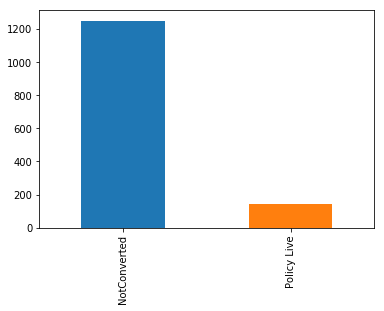

In [6]:
df['FullCascoPolicyStatus'].value_counts().plot(kind='bar')
#yenileme yapmayanlar daha fazla bir kitle

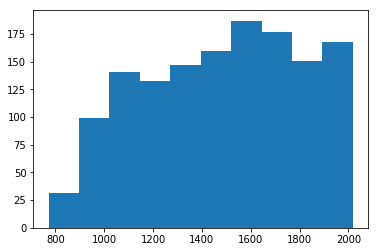

In [15]:
#eski police ücretlerinin normal dağılıp dağılmadınna bakalım
from matplotlib import pyplot
pyplot.hist(df['LastFullCascoGrossPrice'])
pyplot.show()
#hafif sola çarpık dağılımv var.yüksek fiyatlar göze çarpıyor.

In [7]:
#left skewed yani sola çarpık bir dağılım sözkonusu
#normal dağılıma uygunluk için test yapalım
# Shapiro-Wilk Test
from numpy.random import seed
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(df['LastFullCascoGrossPrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

#sola çarpık normal olmayan bir dağılıma sahiptir
#burdan ücretlerimizin yüksekliğinden söz edebiliriz

Statistics=0.965, p=0.000
Sample does not look Gaussian (reject H0)


In [8]:
#eski police ücretlerimiz normal dağılıma uymuyor.
#normal dağılıma uymadığı varsayımı altında eski police ücretlerinin conversion ile arasında bir ilişki varmı diye
#test yapalım
# Kruskal-Wallis H-test
from numpy.random import seed
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# compare samples
stat, p = kruskal(df['LastFullCascoGrossPrice'], list(df['FullCascoPolicyStatus']))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2298.185, p=0.000
Different distributions (reject H0)


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [ ]:
#conversion yapanlar ile yapmayanlar arasında fiyat farkı var,kitle aynı fiyat dağılımına sahip değil.
#yani yenileme yapılmaması durumu fiyattan kaynaklanıyor.

In [9]:
df.head()

,Gender,Age,MaritalStatus,CustomerResidanceCityName,VehicleBrand,VehiclePrice,VehicleAge,LastFullCascoGrossPrice,FullCascoPolicyStatus
0,Male,50,Married,ANTALYA,FORD,43757,10,1392.171,Policy Live
1,Male,42,Married,İSTANBUL,NISSAN,37000,10,947.606,Policy Live
2,Male,40,Married,İSTANBUL,NISSAN,97000,4,871.255,Policy Live
3,Male,35,Married,KOCAELİ,HONDA,61566,10,2006.301,Policy Live
4,Male,29,Married,İSTANBUL,NISSAN,60961,6,1981.749,Policy Live


In [11]:
#çok değişkenli incelemeye başlayalım
#genel anlamda araç fiyatı,yaşı ve son kasko fiyatı arasındaki korelasyona bakalım
df[['VehicleAge','VehiclePrice','LastFullCascoGrossPrice']].corr()
#yaş arttıkça araç fiyatı düşüyor yüksek korelasyon var
#yaş arttıkçaa kasko fiyatını biraz düşürüyor gibi duruyor ters korelasyon.

,VehicleAge,VehiclePrice,LastFullCascoGrossPrice
VehicleAge,1.000000,-0.72427,-0.085039
VehiclePrice,-0.724270,1.00000,0.097730
LastFullCascoGrossPrice,-0.085039,0.09773,1.000000


In [13]:
#yenileme bazında bakalım:
df[['VehicleAge','VehiclePrice','LastFullCascoGrossPrice','FullCascoPolicyStatus']].groupby('FullCascoPolicyStatus').corr()
#sonuçlar benzer hatta yenileme yapmayanlarda kasko fiyatı ile araç yaşı arasında biraz daha fazla ters korelasyon var
#yenileme yapmayanlarda araç fiyatı artıkkça kasko fiyatı artıyor ancak bu oran yenileme yapanlarda daha yüksek
#aslında sadece bu duruma bakaraktan yenileme yapmayan grubın araç fiyat,yaş ve kasko fiyatı bazında daha mantıklı ilişkilere
#sahip olduğunu söyleyebiliriz.

LastFullCascoGrossPrice  \
FullCascoPolicyStatus                                                    
NotConverted          LastFullCascoGrossPrice                 1.000000   
                      VehicleAge                             -0.115794   
                      VehiclePrice                            0.147260   
Policy Live           LastFullCascoGrossPrice                 1.000000   
                      VehicleAge                             -0.094340   
                      VehiclePrice                            0.237992   

                                               VehicleAge  VehiclePrice  
FullCascoPolicyStatus                                                    
NotConverted          LastFullCascoGrossPrice   -0.115794      0.147260  
                      VehicleAge                 1.000000     -0.724220  
                      VehiclePrice              -0.724220      1.000000  
Policy Live           LastFullCascoGrossPrice   -0.094340      0.237992  
                      VehicleAge                 1.000000     -0.741003  
                      VehiclePrice              -0.741003      1.000000

In [14]:
df.head()

,Gender,Age,MaritalStatus,CustomerResidanceCityName,VehicleBrand,VehiclePrice,VehicleAge,LastFullCascoGrossPrice,FullCascoPolicyStatus
0,Male,50,Married,ANTALYA,FORD,43757,10,1392.171,Policy Live
1,Male,42,Married,İSTANBUL,NISSAN,37000,10,947.606,Policy Live
2,Male,40,Married,İSTANBUL,NISSAN,97000,4,871.255,Policy Live
3,Male,35,Married,KOCAELİ,HONDA,61566,10,2006.301,Policy Live
4,Male,29,Married,İSTANBUL,NISSAN,60961,6,1981.749,Policy Live


In [15]:
df[['FullCascoPolicyStatus','VehiclePrice','VehicleAge','LastFullCascoGrossPrice']].groupby('FullCascoPolicyStatus').agg({
    'LastFullCascoGrossPrice' :  [np.min,np.mean,np.max],'VehiclePrice' : [np.min,np.mean,np.max],'VehicleAge' : [np.min,np.mean,np.max]})
#yenileme yapmayanların araç ortalama araç fiyatı daha düşük,ve araç yaşı daha yüksek olmasına rağmen daha çok ücret ödüyor
#gözüküyor.yenileme yapılmamasının sebebi bu olabilir.

LastFullCascoGrossPrice                         \
                                         amin         mean      amax   
FullCascoPolicyStatus                                                  
NotConverted                          849.750  1512.447682  2018.687   
Policy Live                           771.518  1232.422231  2006.301   

                      VehiclePrice                       VehicleAge            \
                              amin          mean    amax       amin      mean   
FullCascoPolicyStatus                                                           
NotConverted                 10800  51935.796962  182902          0  7.384492   
Policy Live                  12449  69039.888112  180000          0  6.356643   

                            
                      amax  
FullCascoPolicyStatus       
NotConverted            14  
Policy Live             14

In [16]:
#çok değişkenli incelemeye devam,araç modelini dahil edelim
from scipy import stats
h1=df.groupby(['FullCascoPolicyStatus','VehicleBrand']).agg(
    {'Age':'mean','VehicleBrand':'count','VehiclePrice':'mean','VehicleAge':'mean','LastFullCascoGrossPrice':'mean','FullCascoPolicyStatus':'count'})

h2=h1.add_suffix('_Count').reset_index()

h2.columns = ['FullCascoPolicyStatus','VehicleBrand','Mean_Personeal_Age','Vehicle_Cnt', 'Mean_Vehicle_Price', 'Mean_Vehicle_Age','Last_Price_Mean','Conversion_Cnt']
h2.head()

,FullCascoPolicyStatus,VehicleBrand,Mean_Personeal_Age,Vehicle_Cnt,Mean_Vehicle_Price,Mean_Vehicle_Age,Last_Price_Mean,Conversion_Cnt
0,NotConverted,AUDI,36.000000,2,74813.000000,7.500000,1369.852000,2
1,NotConverted,BMW,41.000000,2,50261.000000,13.000000,1694.671000,2
2,NotConverted,CHEVROLET,45.904762,21,45661.523810,8.380952,1485.527476,21
3,NotConverted,CITROEN,42.395349,43,43232.186047,7.837209,1497.877163,43
4,NotConverted,DACIA,44.234043,47,44362.425532,6.468085,1542.139851,47


In [96]:
h3=h2.pivot(index='FullCascoPolicyStatus', columns='VehicleBrand', values=['Mean_Vehicle_Price','Mean_Vehicle_Age','Last_Price_Mean']).reset_index()
h3

FullCascoPolicyStatus Mean_Vehicle_Price                         \
VehicleBrand                                     AUDI       BMW    CHEVROLET   
0                     NotConverted            74813.0   50261.0  45661.52381   
1                      Policy Live                NaN  180000.0  44933.50000   

                                                                           \
VehicleBrand  CHRYSLER       CITROEN         DACIA DAIHATSU          FIAT   
0                  NaN  43232.186047  44362.425532  36043.0  36930.055556   
1             140000.0  50503.000000           NaN  25240.0  51362.142857   

                               ...      Last_Price_Mean               \
VehicleBrand          FORD     ...              PEUGEOT      RENAULT   
0             47907.528662     ...          1506.009828  1509.475423   
1             64211.500000     ...           908.275500  1310.185800   

                                                                              \
VehicleBrand RENAULT (OYAK)         SEAT      SKODA      SUZUKI   TOFAS-FIAT   
0               1565.927907  1542.159438  1497.5775  1657.21875  1515.100281   
1               1298.184000   981.871000   968.6974   825.96800  1236.054111   

                                                     
VehicleBrand       TOYOTA   VOLKSWAGEN        VOLVO  
0             1481.661884  1531.949265  1673.360333  
1             1178.434400  1358.398105          NaN  

[2 rows x 91 columns]

In [97]:
h4=pd.DataFrame(h3.iloc[0,1:]/h3.iloc[1,1:])
h5=h4.add_suffix('_Rate').reset_index()
h5.columns = ['Price_Age','VehicleBrand','Rate']
h6=h5.pivot(index='Price_Age', columns='VehicleBrand', values=['Rate']).reset_index()
h6
#convert etme durumuna göre ortalama araba fiyatları ve yaşlarının karşılaştırılması
#convert etmeyenlerin yaşı yüksek
#convert etmeyenlerin araç fiyatları düşük
#ancak ödedikleri miktarlar yüksek
#bu ters ilişki conversion etmemenin nedeni olabilir.

Price_Age Rate                                         \
VehicleBrand                     AUDI       BMW CHEVROLET CHRYSLER   CITROEN   
0                Last_Price_Mean  NaN   1.01769   1.10265      NaN   1.16594   
1               Mean_Vehicle_Age  NaN        13  0.985994      NaN   1.56744   
2             Mean_Vehicle_Price  NaN  0.279228    1.0162      NaN  0.856032   

                                                 ...                       \
VehicleBrand DACIA  DAIHATSU      FIAT     FORD  ...    PEUGEOT   RENAULT   
0              NaN  0.982382   1.05501  1.25073  ...     1.6581   1.15211   
1              NaN  0.769231   1.21803  1.18961  ...    1.38021   1.16424   
2              NaN   1.42801  0.719013  0.74609  ...   0.829228  0.638275   

                                                                              \
VehicleBrand RENAULT (OYAK)      SEAT    SKODA   SUZUKI TOFAS-FIAT    TOYOTA   
0                   1.20624   1.57063  1.54597   2.0064    1.22576   1.25731   
1                    1.3935  0.423077  0.74026    0.325    1.28108   1.03526   
2                  0.756508   1.65202  0.98617  2.09842    0.76544  0.972849   

                               
VehicleBrand VOLKSWAGEN VOLVO  
0               1.12776   NaN  
1               1.25459   NaN  
2              0.837188   NaN  

[3 rows x 31 columns]

In [139]:
h7=h6.transpose().reset_index().rename(columns={'index':'VehicleBrand'})
h7=h7.iloc[1:,]
h7.columns = ['Rates','VehicleBrand','Last_Price_Mean','Mean_Vehicle_Age','Mean_Vehicle_Price']
h7.head()

,Rates,VehicleBrand,Last_Price_Mean,Mean_Vehicle_Age,Mean_Vehicle_Price
1,Rate,AUDI,NaN,NaN,NaN
2,Rate,BMW,1.01769,13,0.279228
3,Rate,CHEVROLET,1.10265,0.985994,1.0162
4,Rate,CHRYSLER,NaN,NaN,NaN
5,Rate,CITROEN,1.16594,1.56744,0.856032


In [ ]:
#sonuç daha eski ve fiyatı daha düşük olan arabalara yüksek ücret tekliflinin verilmesi converrsion ı etkiliyor.
#korelasyon analizinden de anlaşılacağı gibi araç yaşı düştükçe fiyatı da düşer aynı zamanda kasko fiyatı da düşer
#ancak biz yaşı küçük ve fiyatı daha az olan araçlara olması gerekenden yüksek teklif vererek müşterinin satın alma yapmamasını sağlamışı